<a href="https://colab.research.google.com/github/navyavemavarapu/Guvi_Tasks/blob/main/Task5_GUVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/takehome_users.csv",encoding='ISO-8859-1')

In [3]:
df1.head(1)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0


In [4]:
df1.rename(columns={'object_id':'user_id'},inplace=True)

In [5]:
df1.head(2)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [6]:
df1.shape

(12000, 10)

In [7]:
df2 = pd.read_csv("/content/drive/MyDrive/takehome_user_engagement.csv")

In [8]:
df2.shape

(207917, 3)

In [9]:
merged_data = pd.merge(df1, df2,on='user_id',how='right')

In [10]:
merged_data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

In [11]:
merged_data.shape

(207917, 12)

In [12]:
merged_data['date'] = merged_data['time_stamp'].astype('datetime64')
merged_data['week'] = merged_data['date'].dt.isocalendar().week
merged_data['year'] = merged_data['date'].dt.isocalendar().year
merged_data['month'] = merged_data['date'].dt.month

In [13]:
merged_data.head(2)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,date,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,2014-04-22 03:53:30,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1,2013-11-15 03:45:04,46,2013,11


In [14]:
groupby_week = merged_data.groupby(['user_id','week','month','year'])['visited'].count().reset_index()

In [15]:
groupby_week.head()

,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,12,2014,1
2,2,2,1,2014,1
3,2,6,2,2014,3
4,2,7,2,2014,2


In [16]:
adopted_user = groupby_week.loc[groupby_week['visited'] >=3]
len(adopted_user)

32754

In [17]:
groupby_week['adopted_user'] = groupby_week['visited'].apply(lambda x: 1 if x >= 3 else 0)

In [18]:
groupby_week.head()

,user_id,week,month,year,visited,adopted_user
0,1,17,4,2014,1,0
1,2,1,12,2014,1,0
2,2,2,1,2014,1,0
3,2,6,2,2014,3,1
4,2,7,2,2014,2,0


In [19]:
df3 = groupby_week[(groupby_week['visited']>=3)]
df3.head(2)

,user_id,week,month,year,visited,adopted_user
3,2,6,2,2014,3,1
17,10,1,1,2014,4,1


##Data visualization##

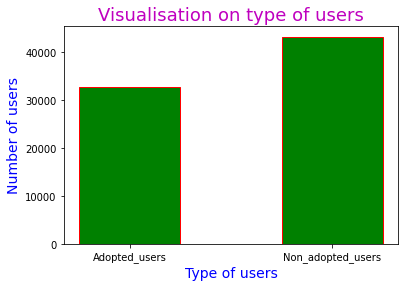

In [20]:
x = ['Adopted_users','Non_adopted_users']
y = [(groupby_week.adopted_user.value_counts()[1]),(groupby_week.adopted_user.value_counts()[0])]
plt.bar(x,y,color='g',edgecolor='r',width=0.5)

plt.xlabel("Type of users",color='blue',fontsize=14)
plt.ylabel("Number of users",color='blue',fontsize=14)
plt.title("Visualisation on type of users",color='m',fontsize=18)
plt.show()

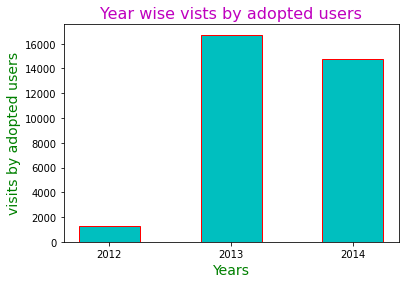

In [21]:
x = ['2012','2013','2014']
q= df3.year.value_counts()
y = [q[2012],q[2013],q[2014]]
plt.bar(x,y,color='c',edgecolor='r',width=0.5)

plt.xlabel("Years",color='g',fontsize=14)
plt.ylabel("visits by adopted users",color='g',fontsize=14)
plt.title("Year wise vists by adopted users",color='m',fontsize=16)
plt.show()

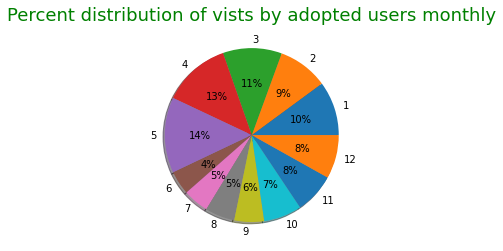

In [22]:
q = df3.groupby(['month']).size().values
p = df3.groupby(['month']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x, autopct='%1.0f%%',shadow=True)
plt.title("Percent distribution of vists by adopted users monthly", color = 'g',fontsize=18)
plt.show()

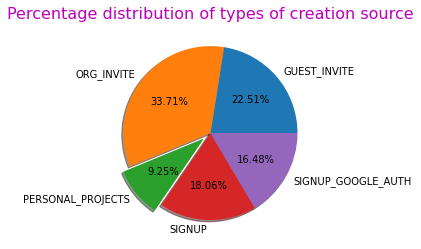

In [23]:
q = merged_data.groupby(['creation_source']).size().values
p = merged_data.groupby(['creation_source']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x,explode= (0,0,0.1,0,0), autopct='%1.2f%%',shadow=True)
plt.title("Percentage distribution of types of creation source", color = 'm',fontsize=16)
plt.show()

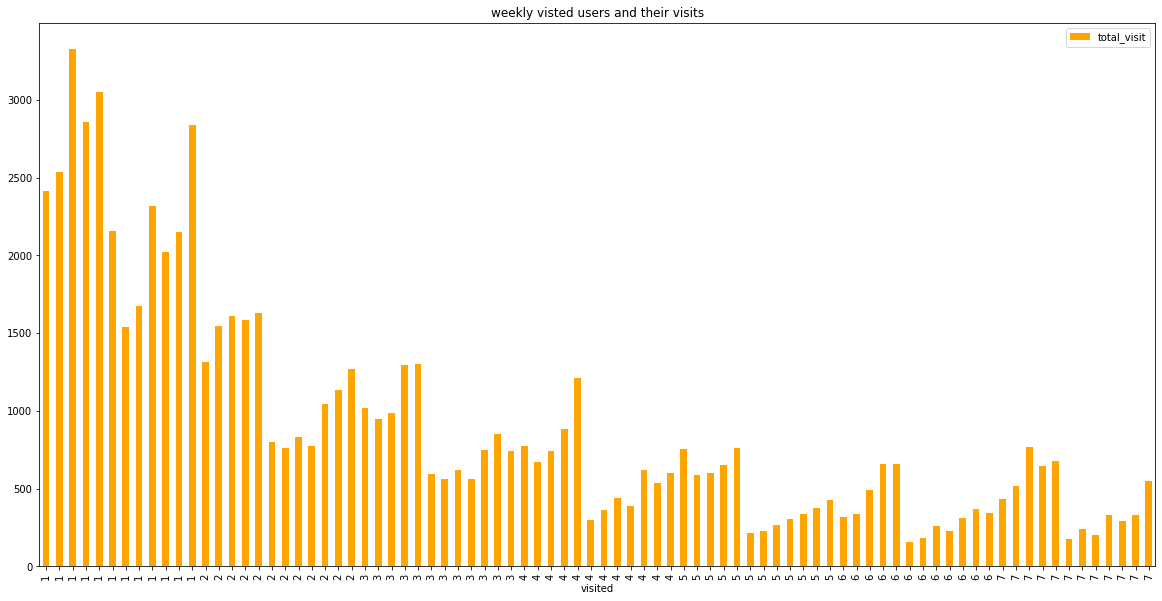

In [31]:
df5=groupby_week
df5= df5.groupby(['visited','month']).size()
df5 = df5.to_frame(name = 'total_visit').reset_index()
t= df5[df5['total_visit']>=3]
t.plot.bar(x='visited', y='total_visit', figsize=(20,10), title="weekly visted users and their visits",color='orange')
plt.show()